#Generate data

In [ ]:
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#generate data for regression
X,y = make_regression(n_samples=20, n_features=500, n_informative=5, noise=5)
#split data to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape)
y.shape

(20, 500)


(20,)

#LASSO Regression
- depending on lamda

In [ ]:
def MyLasso(lamda) :
    lasso = Lasso(alpha=lamda)
    # Fit the Lasso model
    lasso.fit(X_train, y_train)
    
    # Get Expected Precision Error
    EPE_test=(np.sum(np.array(y_test-np.matmul(X_test,lasso.coef_))**2))**(1/2) 
    EPE_train=(np.sum(np.array(y_train-np.matmul(X_train,lasso.coef_))**2))**(1/2)
    
    return EPE_test, EPE_train

#Experiment 
- to get optimized lamda
- which makes the expected precision error minimum

In [ ]:
lamda=np.arange(0,1,0.01)
all_EPE_test=[]
all_EPE_train=[]

for i in lamda:
  result=MyLasso(i)
  all_EPE_test.append(result[0])
  all_EPE_train.append(result[1])


#Result
- Optimized lambda
- sparse Beta

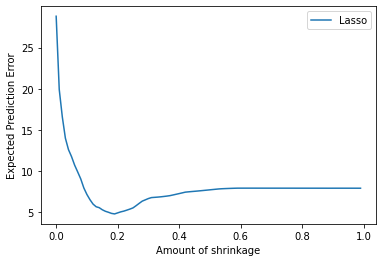


The lamda is  0.19
As the result of LASSO , The number of Zero components of Beta is  481


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.90019192398392, tolerance: 29.986159773298272
  positive)


In [ ]:
plt.plot(lamda,np.array(all_EPE_test)/len(y),label='Lasso')
#plt.plot(lamda,np.array(all_EPE_train)/len(y),label='train')
plt.legend()
plt.xlabel('Amount of shrinkage')
plt.ylabel('Expected Prediction Error')
plt.show()
print("")
print("The lamda is ",lamda[np.argmin(all_EPE_test)])

lasso = Lasso(alpha=lamda[np.argmin(score)])
    #
    # Fit the Lasso model
    #
lasso.fit(X_train, y_train)
count=0
for i in range(len(lasso.coef_)):
  if lasso.coef_[i] ==0 :

    count=count+1

print("As the result of LASSO , The number of Zero components of Beta is ",count)